### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
# car column is mostly empty
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [18]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [36]:
# 56.8% of total observations chose ot accept the coupon
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

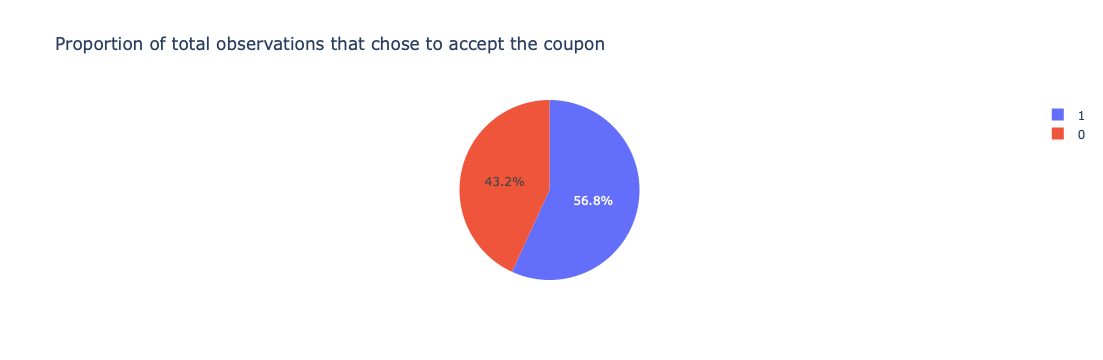

In [42]:
fig = px.pie(values=data['Y'].value_counts(), names=data['Y'].value_counts().index, title='Proportion of total observations that chose to accept the coupon')
fig.show()

5. Use a bar plot to visualize the `coupon` column.

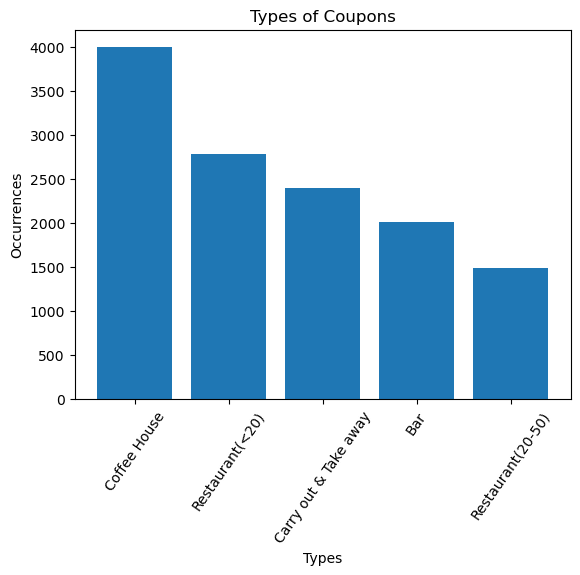

In [58]:
plt.bar(data['coupon'].value_counts().index, data['coupon'].value_counts())
plt.title('Types of Coupons')
plt.xlabel('Types')
plt.ylabel('Occurrences')
plt.xticks(rotation=55)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

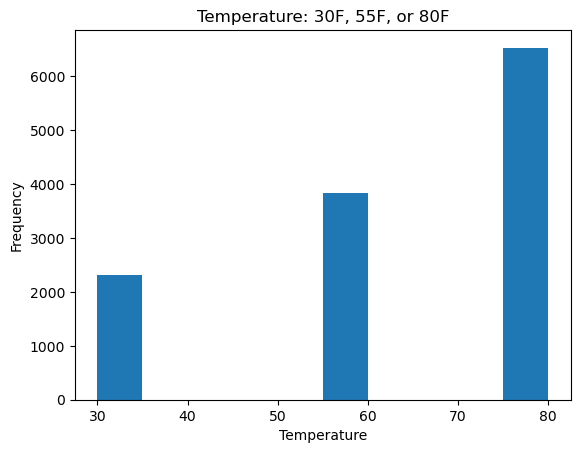

In [68]:
plt.hist(data['temperature'])
plt.title("Temperature: 30F, 55F, or 80F")
plt.xlabel('Temperature')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Temperature: 30F, 55F, or 80F')

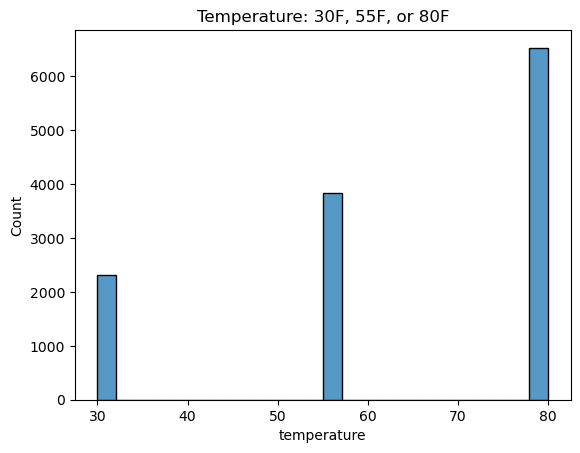

In [66]:
sns.histplot(data=data, x='temperature')
plt.title('Temperature: 30F, 55F, or 80F')

In [217]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [83]:
bar_coupon_data = data.loc[data['coupon']=='Bar']
bar_coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [85]:
# 41% of bar coupons were accepted
bar_coupon_data['Y'].value_counts()

Y
0    1190
1     827
Name: count, dtype: int64

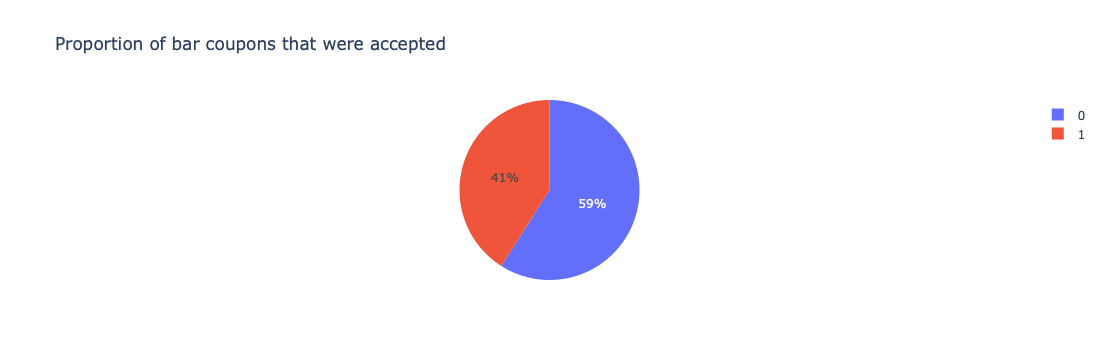

In [87]:
fig = px.pie(values=bar_coupon_data['Y'].value_counts(), names=bar_coupon_data['Y'].value_counts().index, title='Proportion of bar coupons that were accepted')
fig.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


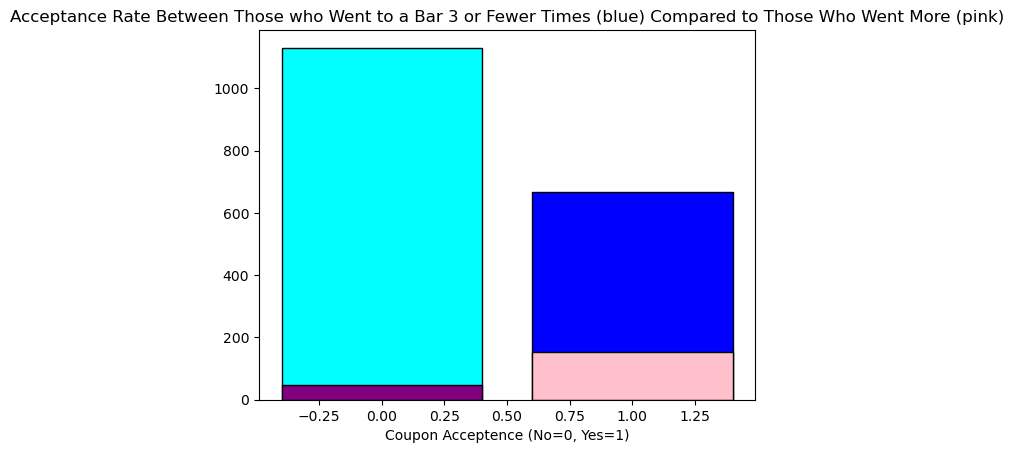

In [213]:
fewer = ['never', 'less1', '1~3']
more = ['4~8', 'gt8']
three_or_fewer = bar_coupon_data.loc[bar_coupon_data['Bar'].isin(fewer)]
more_than_three = bar_coupon_data.loc[bar_coupon_data['Bar'].isin(more)]
plt.bar(three_or_fewer['Y'].value_counts().sort_index().index, three_or_fewer['Y'].value_counts().sort_index(), color=['cyan', 'blue'], edgecolor='black')
plt.bar(more_than_three['Y'].value_counts().sort_index().index, more_than_three['Y'].value_counts().sort_index(), color=['Purple', 'Pink'], edgecolor='black')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
plt.title('Acceptance Rate Between Those who Went to a Bar 3 or Fewer Times (blue) Compared to Those Who Went More (pink)')
plt.show()
# The bar coupon acceptance rate for those who went to a bar 3 or fewer times is 37% and 77% among those who went more often. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

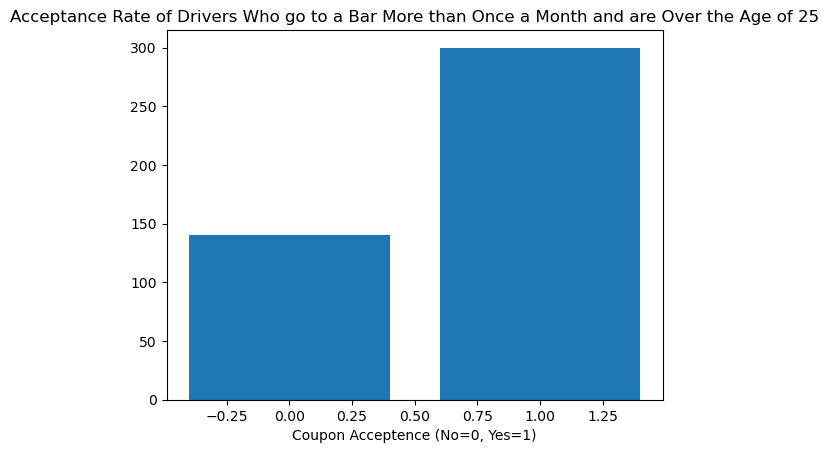

In [269]:
less_than_1permonth = ['never', 'less1']
age_under_25 = ['21', 'below21']
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('Bar not in @less_than_1permonth & age not in @age_under_25')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who go to a Bar More than Once a Month and are Over the Age of 25')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')

Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

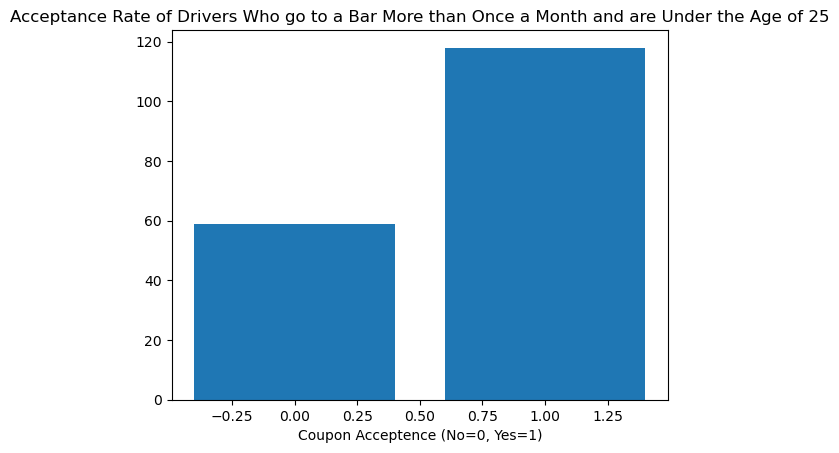

In [271]:
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('Bar not in @less_than_1permonth & age in @age_under_25')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who go to a Bar More than Once a Month and are Under the Age of 25')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
# Of the drivers who go to a bar more than once a month, 68% over the age of 25 accepted a bar coupon compared to 67% of those under 25 accepted a bar coupon

In [294]:
bar_coupon_data.query('Bar not in @less_than_1permonth & passanger in @non_kid_passengers & occupation not in @occupation')[['Y']].value_counts()

Y
1    145
0     60
Name: count, dtype: int64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

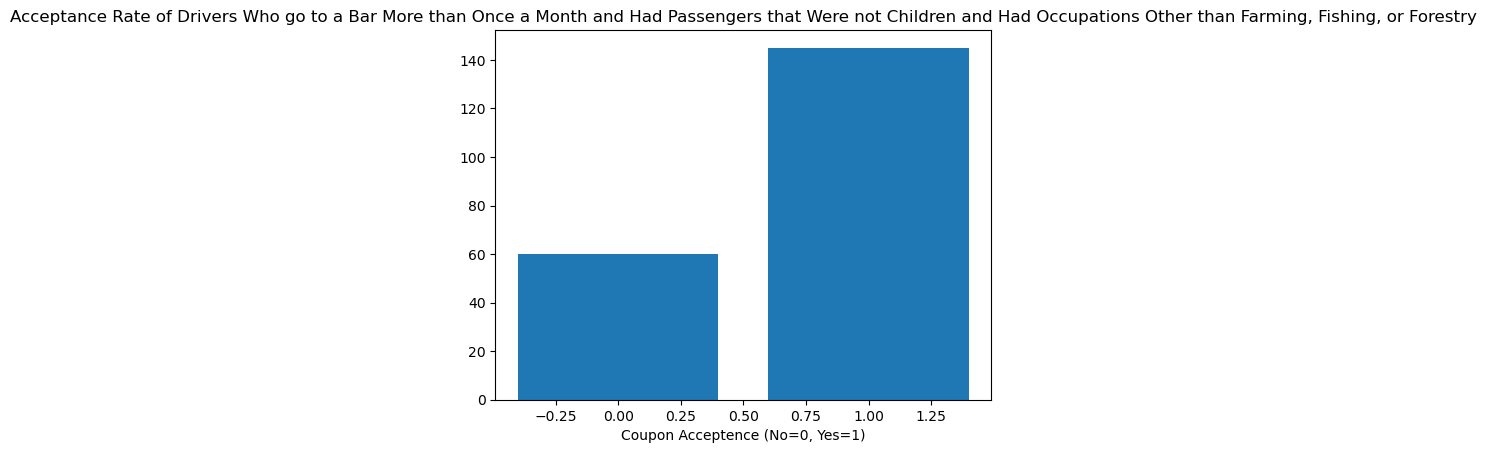

In [314]:
non_kid_passengers = ['Friend(s)', 'Partner']
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('Bar not in @less_than_1permonth & passanger in @non_kid_passengers & occupation != "Farming Fishing & Forestry"')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who go to a Bar More than Once a Month and Had Passengers that Were not Children and Had Occupations Other than Farming, Fishing, or Forestry')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
# Of the drivers who go to bars more than once a month and had passengers that were not children and had occupations other than farming, fishing, or forestry, 71% accepted the bar coupon

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

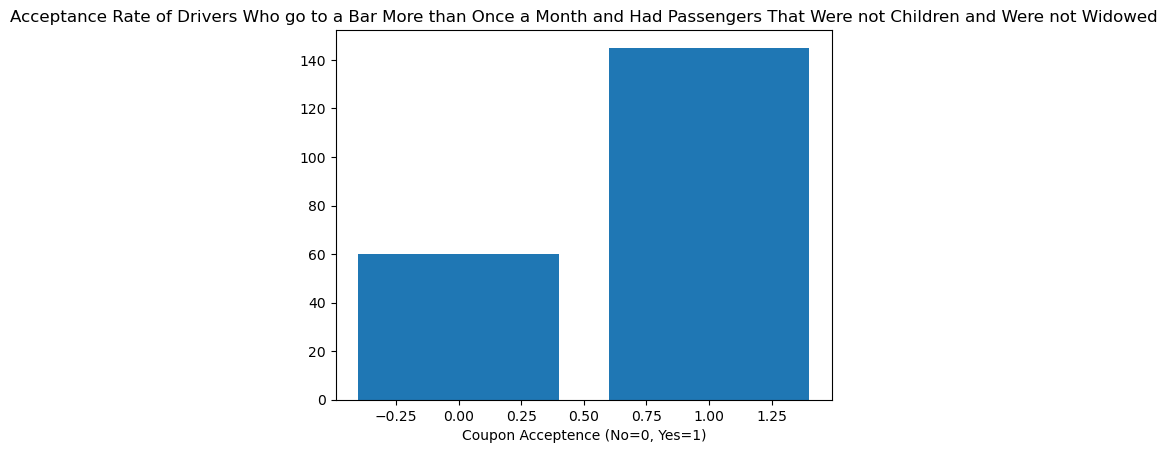

In [316]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('Bar not in @less_than_1permonth & passanger in @non_kid_passengers & maritalStatus != "Widowed"')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who go to a Bar More than Once a Month and Had Passengers That Were not Children and Were not Widowed')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
# Of the drivers who go to a bar more than once a month, had passengers that were not children, and were not widowed, 71% accepted the bar coupon

In [300]:
bar_coupon_data['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

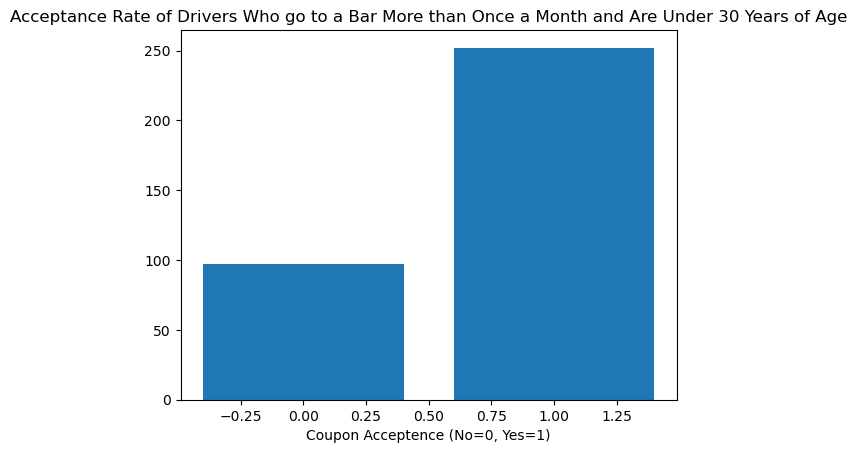

In [320]:
#go to bars more than once a month and are under the age of 30 OR
age_under_30 = ['21', 'below21', '26']
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('Bar not in @less_than_1permonth & age in @age_under_30')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who go to a Bar More than Once a Month and Are Under 30 Years of Age')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
# Of the drivers who go to a bar more than once a month and are under 30 years old, 72% accepted the bar coupon

Text(0.5, 0, 'Coupon Acceptence (No=0, Yes=1)')

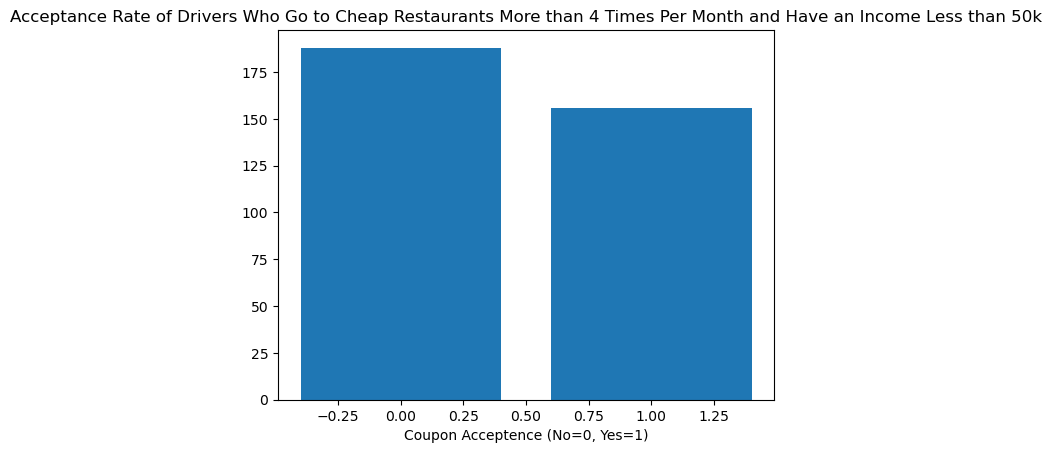

In [334]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurants_often = ['4~8', 'gt8']
low_income = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
plt.bar(bar_coupon_data['Y'].value_counts().sort_index().index, bar_coupon_data.query('RestaurantLessThan20  in @cheap_restaurants_often & income in @low_income')[['Y']].value_counts().sort_index())
plt.title('Acceptance Rate of Drivers Who Go to Cheap Restaurants More than 4 Times Per Month and Have an Income Less than 50k')
plt.xlabel('Coupon Acceptence (No=0, Yes=1)')
# Of the drivers who go go to cheap restaurants more than 4 times per month and have an income less than 50k, 45% accepted the bar coupon

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

-  in total, 41% of bar coupons were accepted
-  The bar coupon acceptance rate for those who went to a bar 3 or fewer times is 37% and 77% among those who went more often. 
-  Of the drivers who go to a bar more than once a month, 68% over the age of 25 accepted a bar coupon compared to 67% of those under 25 accepted a bar coupon
-  Of the drivers who go to bars more than once a month and had passengers that were not children and had occupations other than farming, fishing, or forestry, 71% accepted the bar coupon
-  Of the drivers who go to a bar more than once a month, had passengers that were not children, and were not widowed, 71% accepted the bar coupon
-  Of the drivers who go to a bar more than once a month and are under 30 years old, 72% accepted the bar coupon
-  Of the drivers who go go to cheap restaurants more than 4 times per month and have an income less than 50k, 45% accepted the bar coupon

In general, the bar coupon acceptance rate is higher among individuals who go to bars more frequently compared to those who go less frequently. Also, of drivers who go to bars more than once a month, factors like age, passengers, occupation, and marital status didn't really affect the likelihood of accepting the bar coupons. Lower income does seem to have a correlation with a lower likelihood of accepting a bar coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  